# LeNet Architecture

In [1]:
# Import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the neccesary Packages.
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('datasets/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2440 images belonging to 15 classes.


In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('datasets/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1190 images belonging to 15 classes.


In [5]:
import tensorflow as tf
Classifier=Sequential()
Classifier.add(Convolution2D(32,3,3,input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(15, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [6]:
# Set the file path
model_path = "LeNet1.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [7]:

epochs = 100
batch_size = 32

In [8]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/100
76/76 [==============================] - ETA: 0s - loss: 2.5424 - accuracy: 0.1528 - precision: 0.5000 - recall: 0.0012 - mean_squared_error: 0.0605 - mean_absolute_error: 0.1212
Epoch 1: accuracy improved from -inf to 0.15282, saving model to LeNet1.h5
76/76 [==============================] - 75s 937ms/step - loss: 2.5424 - accuracy: 0.1528 - precision: 0.5000 - recall: 0.0012 - mean_squared_error: 0.0605 - mean_absolute_error: 0.1212 - val_loss: 2.1319 - val_accuracy: 0.4079 - val_precision: 1.0000 - val_recall: 8.4459e-04 - val_mean_squared_error: 0.0551 - val_mean_absolute_error: 0.1150
Epoch 2/100
76/76 [==============================] - ETA: 0s - loss: 1.8885 - accuracy: 0.3966 - precision: 0.6954 - recall: 0.0939 - mean_squared_error: 0.0502 - mean_absolute_error: 0.1036
Epoch 2: accuracy improved from 0.15282 to 0.39659, saving model to LeNet1.h5
76/76 [==============================] - 50s 657ms/step - loss: 1.8885 - accuracy: 0.3966 - precision: 0.6954 - recall: 0

76/76 [==============================] - 50s 657ms/step - loss: 0.5707 - accuracy: 0.8144 - precision: 0.8705 - recall: 0.7512 - mean_squared_error: 0.0177 - mean_absolute_error: 0.0370 - val_loss: 0.4129 - val_accuracy: 0.8666 - val_precision: 0.9055 - val_recall: 0.8176 - val_mean_squared_error: 0.0130 - val_mean_absolute_error: 0.0271
Epoch 15/100
76/76 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.8227 - precision: 0.8812 - recall: 0.7733 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0349
Epoch 15: accuracy improved from 0.81437 to 0.82267, saving model to LeNet1.h5
76/76 [==============================] - 50s 655ms/step - loss: 0.5431 - accuracy: 0.8227 - precision: 0.8812 - recall: 0.7733 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0349 - val_loss: 0.3861 - val_accuracy: 0.8674 - val_precision: 0.9016 - val_recall: 0.8361 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0266
Epoch 16/100
76/76 [=============================

Epoch 28/100
76/76 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9323 - precision: 0.9480 - recall: 0.9157 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0147
Epoch 28: accuracy did not improve from 0.93314
76/76 [==============================] - 50s 655ms/step - loss: 0.2098 - accuracy: 0.9323 - precision: 0.9480 - recall: 0.9157 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0147 - val_loss: 0.0553 - val_accuracy: 0.9831 - val_precision: 0.9856 - val_recall: 0.9797 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0052
Epoch 29/100
76/76 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9348 - precision: 0.9491 - recall: 0.9223 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0139
Epoch 29: accuracy improved from 0.93314 to 0.93480, saving model to LeNet1.h5
76/76 [==============================] - 50s 658ms/step - loss: 0.1989 - accuracy: 0.9348 - precision: 0.9491 - recall: 0.9223 - mean_squared_error: 

Epoch 42/100
76/76 [==============================] - ETA: 0s - loss: 0.0887 - accuracy: 0.9713 - precision: 0.9745 - recall: 0.9693 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0063
Epoch 42: accuracy did not improve from 0.97301
76/76 [==============================] - 51s 666ms/step - loss: 0.0887 - accuracy: 0.9713 - precision: 0.9745 - recall: 0.9693 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0063 - val_loss: 0.0173 - val_accuracy: 0.9966 - val_precision: 0.9966 - val_recall: 0.9966 - val_mean_squared_error: 4.5367e-04 - val_mean_absolute_error: 0.0019
Epoch 43/100
76/76 [==============================] - ETA: 0s - loss: 0.1038 - accuracy: 0.9664 - precision: 0.9683 - recall: 0.9635 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0069
Epoch 43: accuracy did not improve from 0.97301
76/76 [==============================] - 51s 668ms/step - loss: 0.1038 - accuracy: 0.9664 - precision: 0.9683 - recall: 0.9635 - mean_squared_error: 0.0034 - mean_absolute_erro

Epoch 56/100
76/76 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9805 - precision: 0.9809 - recall: 0.9797 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0040
Epoch 56: accuracy did not improve from 0.98256
76/76 [==============================] - 33s 428ms/step - loss: 0.0530 - accuracy: 0.9805 - precision: 0.9809 - recall: 0.9797 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0040 - val_loss: 0.0059 - val_accuracy: 0.9975 - val_precision: 0.9975 - val_recall: 0.9975 - val_mean_squared_error: 1.8707e-04 - val_mean_absolute_error: 5.5204e-04
Epoch 57/100
76/76 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9821 - precision: 0.9838 - recall: 0.9821 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0035
Epoch 57: accuracy did not improve from 0.98256
76/76 [==============================] - 33s 428ms/step - loss: 0.0566 - accuracy: 0.9821 - precision: 0.9838 - recall: 0.9821 - mean_squared_error: 0.0018 - mean_absolute_

Epoch 70/100
76/76 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9888 - precision: 0.9888 - recall: 0.9888 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0023
Epoch 70: accuracy improved from 0.98754 to 0.98879, saving model to LeNet1.h5
76/76 [==============================] - 33s 432ms/step - loss: 0.0338 - accuracy: 0.9888 - precision: 0.9888 - recall: 0.9888 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0023 - val_loss: 0.0078 - val_accuracy: 0.9983 - val_precision: 0.9983 - val_recall: 0.9975 - val_mean_squared_error: 2.4020e-04 - val_mean_absolute_error: 6.1285e-04
Epoch 71/100
76/76 [==============================] - ETA: 0s - loss: 0.0348 - accuracy: 0.9892 - precision: 0.9896 - recall: 0.9892 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0021
Epoch 71: accuracy improved from 0.98879 to 0.98920, saving model to LeNet1.h5
76/76 [==============================] - 33s 434ms/step - loss: 0.0348 - accuracy: 0.9892 - precision: 0.9896 

Epoch 84/100
76/76 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9934 - precision: 0.9933 - recall: 0.9925 - mean_squared_error: 7.9217e-04 - mean_absolute_error: 0.0014
Epoch 84: accuracy improved from 0.99086 to 0.99336, saving model to LeNet1.h5
76/76 [==============================] - 33s 440ms/step - loss: 0.0229 - accuracy: 0.9934 - precision: 0.9933 - recall: 0.9925 - mean_squared_error: 7.9217e-04 - mean_absolute_error: 0.0014 - val_loss: 0.0023 - val_accuracy: 0.9992 - val_precision: 0.9992 - val_recall: 0.9992 - val_mean_squared_error: 6.9139e-05 - val_mean_absolute_error: 2.4713e-04
Epoch 85/100
76/76 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9888 - precision: 0.9888 - recall: 0.9875 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0020
Epoch 85: accuracy did not improve from 0.99336
76/76 [==============================] - 33s 433ms/step - loss: 0.0430 - accuracy: 0.9888 - precision: 0.9888 - recall: 0.9875 - mean

Epoch 98/100
76/76 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9875 - precision: 0.9884 - recall: 0.9867 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0023
Epoch 98: accuracy did not improve from 0.99377
76/76 [==============================] - 33s 434ms/step - loss: 0.0497 - accuracy: 0.9875 - precision: 0.9884 - recall: 0.9867 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0023 - val_loss: 0.0026 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_mean_squared_error: 5.5124e-05 - val_mean_absolute_error: 3.0620e-04
Epoch 99/100
76/76 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9888 - precision: 0.9892 - recall: 0.9880 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0018
Epoch 99: accuracy did not improve from 0.99377
76/76 [==============================] - 33s 433ms/step - loss: 0.0301 - accuracy: 0.9888 - precision: 0.9892 - recall: 0.9880 - mean_squared_error: 0.0011 - mean_absolute_

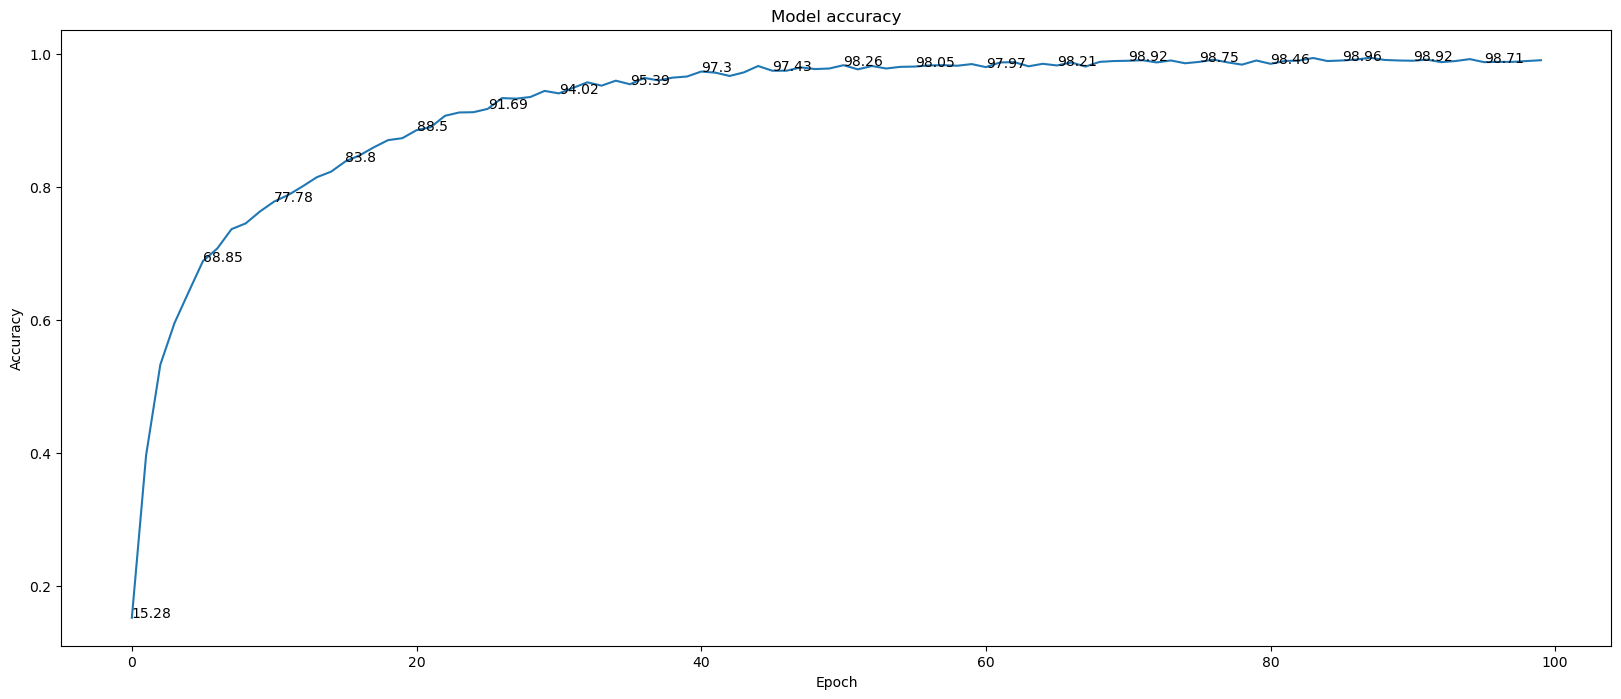

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

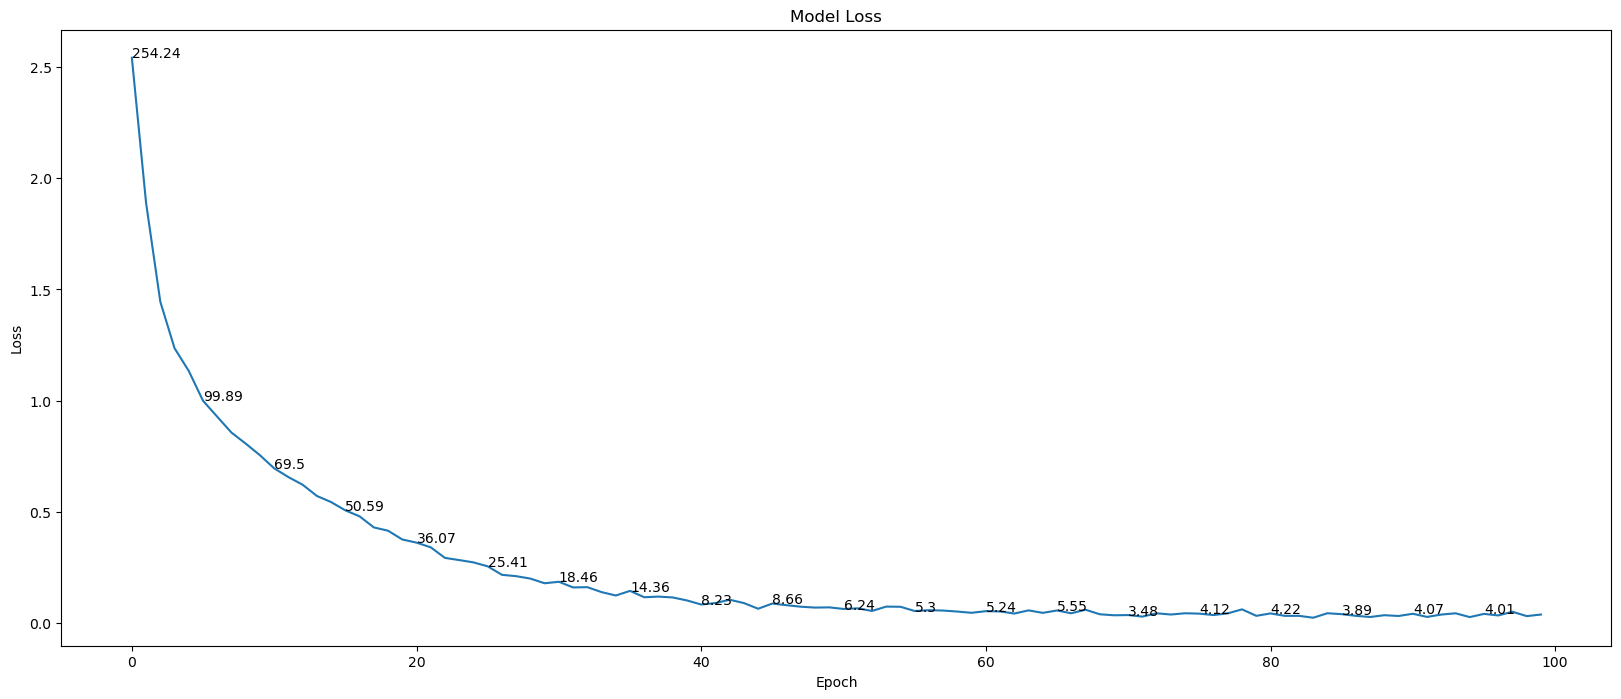

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()